In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [380]:
random.seed(10)
np.random.seed(10)

In [2]:
data = pd.read_csv("Données_Projet_ISUP_E-Remy_2020-2021.csv", sep =';',encoding='latin-1')
data.rename(columns={data.columns[1]: "Debit", data.columns[2]: "Hauteur"}, inplace=True)

In [3]:
data.head()

,Année,Debit,Hauteur
0,1849,3854,NaN
1,1850,1256,4.0
2,1851,1649,4.5
3,1852,1605,4.3
4,1853,341,1.7


#### Définition de la première version de la fonction coût total d'investissement durant T années

Nous allons definir deux versions de la fonction coût d'investissement. Cette première version v1 dependend uniquement de la hauteur. Le nombre d'année pour le quel nous voulons optimiser ce coût étant fixé à $T=30$.

En utilisant les données du tableau $5$ nous avons defini la fonction de coût d'investissemnt continue par morceau et ne dependant que de hd.

In [206]:
def cout_tot_inv_v1(hd, T=30):
    """
    Cout total d'investissement 
    """
    cout_ = 0
    if hd > 0 and hd <=0.1:
        cout_ = 100
    elif hd<=0.5:
        cout_ = 225
    elif hd<=1:
        cout_ = 1034
    elif hd<=2:
        cout_ = 4750
    elif hd<=3:
        cout_ = 1023
    elif hd<=4:
        cout_ = 16971
    elif hd<=5:
        cout_ = 21692
    elif hd<=6:
        cout_ = 26509
    elif hd<=7:
        cout_ = 31408
    elif hd<=8:
        cout_ = 36377
    elif hd<=9:
        cout_ = 41409
    else:
        cout_ = 46498
    return cout_ + T*0.01*cout_
cout_tot_inv(10)

60447.4

#### Définition de la deuxième version de la fonction coût total d'investissement durant T années

Dans cette deuxième version de la fonction coût d'inverstissement, nous avons consideré qu'elle depend de deux variables: la hauteur $h_d$ et la longueur $l_d$ de la digue.

Ainsi en utilisant toujours les données du tableau $5$, nous avons defini la fonction coût d'investissement comme une fonction continue par morceau.
Cette fonction est definie en fonction de la partition de la combinaison entre la hauteur $h_d$ et la longueur $l_d$ de la digue de sorte à mettre plus de poids à la hauteur car son coût est plus élévé. 

In [2]:
def cout_tot_inv_v2(hd=7, ld=5000, alpah1=0.8, alpha2=0.2, T=30):
    """
    Cout total d'investissement 
    """
    peri = alpah1*hd + alpha2*ld
    cout_ = 0
    if peri > 0 and peri <=alpha2*1000 + alpah1*0.1:
        cout_ = 100
    elif peri<=alpha2*1500 + alpah1*0.5:
        cout_ = 225
    elif peri<=alpha2*2437 + alpah1*1:
        cout_ = 1034
    elif peri<=alpha2*3959 + alpah1*2:
        cout_ = 4750
    elif peri<=alpha2*5000 + alpah1*3:
        cout_ = 1023
    elif peri<=alpha2*5000 + alpah1*4:
        cout_ = 16971
    elif peri<=alpha2*5000 + alpah1*5:
        cout_ = 21692
    
    elif peri<=alpha2*5000 + alpah1*6:
        cout_ = 26509
    elif peri<=alpha2*5000 + alpah1*7:
        cout_ = 31408
    elif peri<=alpha2*5000 + alpah1*8:
        cout_ = 36377
        
    elif peri<=alpha2*5000 + alpah1*9:
        cout_ = 41409
    else:
        cout_ = 46498
    
    return cout_ #+ T*0.01*cout_

cout_tot_inv_v2()

31408

##### Définition de la fonction coût total dommage annuel

En utilisant les données du tableau $4$ nous avons defini la fonction de coût de dommage annuel continue par morceau et ne dependant que de $h_d$ et prend en argument les surverses des T prochaines années. Pour les surverse, nous avons utilisé l'équation $(1)$ pour simuler les hauteurs maximums d'eau dans les T prochaines années. 

In [165]:
def cout_dommage_annuel(s, hd):
    """
    Calcule le cout de dommage
    """
    m=1000 # pour la convertion en k£
    if s < 0:
        cs = 0
        cg = 0
   
    elif s==0:
        cs = 0
        cg = 0.1*cout_tot_inv(hd, T=1)
    elif s<=0.5:
        cs = 150*m
        cg = 0.5*cout_tot_inv(hd, T=1)
    elif s<=1:
        cs = 1500*m
        cg = cout_tot_inv(hd, T=1)
    elif s<=1.5:
        cs = 2000*m
        cg = cout_tot_inv(hd, T=1)
    else:
        cs = 2000*m
        cg = cout_tot_inv(hd, T=1)
    return cs + cg
cout_dommage_annuel(0, 1000)

4696.298000000001

#### Définition de la fonction coût dommage durant T années

En utilisant la fonction coût dommage annuel defini précédemment, nous avons défini la fonction coût dommage pour $T$ années

In [157]:
def dommage_periodique(surverses:list, hd, T=30):
    s = 0
    if len(surverses)==T:
        for surverse in surverses:
            s+= cout_dommage_annuel(surverse, hd)
    else:
        raise("Erreur la taille de la surverses doit être égale à T")
        
    return s
dommage_periodique([0, 1, -3], hd=2, T=3)

1505277.25

#### Définition du coût complet version 1

Nous allons definir deux versions de la fonction coût complet.

Dans la première version de la fonction coût complet, la fonction coût d'investissement depend que de la hauteur de la digue.

Vu que la fonction coût complet est une combinaison du coût d'investissement et du coût de dommage alors nous avons mit des poids $a$ et $b$ respectivement au coût d'investissement et au coût de dommage de sorte à pouvoir discriminer l'un par rapport à l'autre.

In [243]:
def cout_complet_moy_v1(surverses, hd, T=30, a=1, b=1):
    """
    Cette fonction calcule le cout complet en faisant la pondération des coûts d'investissements
    et de dommages
    --------------
    arguments:
    a: poids affecté au coût d'investissement, 
    b: poids affecté au coût d
    """
    #poids de chaque couts intermédiare
    return (a*cout_tot_inv_v1(hd,T) + b*dommage_periodique(surverses,hd,T))/T
cout_complet_moy_v1([1, 1, 1], hd=10, T=3)

1562927.2933333332

#### Définition du coût complet version 2

Cette vesion prend en compte la fonction d'investissement qui depend de $h_d$ et $l_d$

In [242]:
def cout_complet_moy_v2(surverses, hd, ld, T=30, a=1, b=1):
    """
    Cette fonction calcule le cout complet en faisant la pondération des coûts d'investissements
    et de dommages
    --------------
    arguments:
    a: poids affecté au coût d'investissement, 
    b: poids affecté au coût d
    """
    #poids de chaque couts intermédiare
    return (a*cout_tot_inv_v2(hd=hd, ld=ld, alpah1=0.8, alpha2=0.2, T=30) + b*dommage_periodique(surverses,hd,T))/T
cout_complet_moy_v1([1, 1, 1], hd=10, ld=5000, T=3)

1562462.3133333332

### Réprésentation graphique du coût complet

#### Définition de la fonction qui initialise aléatoirement hd

In [237]:
def generate_hd(n, m, M):
    u = np.random.random(n)
    return list(m + (M-m)*u)
generate_hd(5, 3, 4)

[3.051168276256793,
 3.5315739317226145,
 3.5569748402104944,
 3.5761457384971087,
 3.6861597392808694]

#### Définition de la fonction qui simule les hauteurs de l'eau pour les T prochaines années

In [248]:
def generate_H(M):
    
  ## CETTE FONCTION NOUS DONNE LA HAUTEUR MAXIMALE APRES SIMULATION
  # M : LE NOMBRE DE SIMULATION
    X = None
  ## CETTE FONCTION SIMULE UNE REALISATION DE CHAQUE VARIABLE 
  ## D'ENTREE ET NOUS DONNE LE RESULTAT DU MODELE H'
    Q = np.random.gumbel(loc=1013, scale=558, size=M)#Rgumbel(1,1013,558)
    K_s = np.random.normal(loc=30,scale=7.5, size=M)
    Z_v = np.random.triangular(left=49, mode=50, right=51, size=M)#rtrian(49,51,50)
    Z_m = np.random.triangular(left=54, mode=55, right=56, size=M) #rtrian(54,56,55)
    L = 5000
    B = 300
    return ((Q/(K_s*B*np.sqrt((Z_m-Z_v)/L)))**(3/5))
H = generate_H(30)
H

array([1.03739684, 2.42253001, 2.61464568, 2.05968698, 2.45718922,
       1.75939473, 2.10207057, 3.11898462, 4.00760642, 2.39334017,
       1.38695475, 3.22692916, 1.48991138, 1.68040177, 2.31187015,
       2.91270215, 2.23042206, 2.38930664, 1.98514938, 0.5266752 ,
       2.12214694, 0.89452716, 2.18086119, 3.05346286, 2.50434502,
       3.30994838, 0.27647171, 3.34780359, 1.83176916, 2.46242005])

#### Définition de la fonction qui calcule les surverses

In [239]:
def calcul_surverces(T,H, hd):
    #H = generate_H(T)
    surverses = H - hd
    return surverses
calcul_surverces(T=3, H=H, hd=3)

array([-0.23456131,  1.04230992, -0.6099114 , -1.44616984,  0.2061941 ,
        0.32594073,  0.33341365,  1.28455655, -0.18625045, -2.01826536,
        1.44028575, -0.65751792, -0.71150068, -2.20516792, -1.39689299,
       -1.77314314, -0.9644393 , -0.39866529, -1.61286872, -2.09669249,
       -1.36090671, -0.8696311 ,  0.59303202, -0.88976639,  0.12577828,
        0.11240615, -0.74399825, -2.07524711, -0.4052686 , -0.27576195])

Après la définition des fonctions intermediaires precedente, nous allons faire la representation graphique de la version 1 de la fonction coût complet qui ne depend que de $h_d$.

In [240]:
def return_x_y(T=30, n=1000):
    H_ = generate_H(T)
    surverses_ = []
    x = []
    y = []
    hds = np.linspace(0, 15, n)
    for hd in hds:
        surverses_ = calcul_surverces(T=T,H=H, hd=hd)
        y.append(cout_complet_moy_v1(surverses_, hd=hd, T=T, a=0.99, b=0.01))
        x.append(hd)
    return x, y

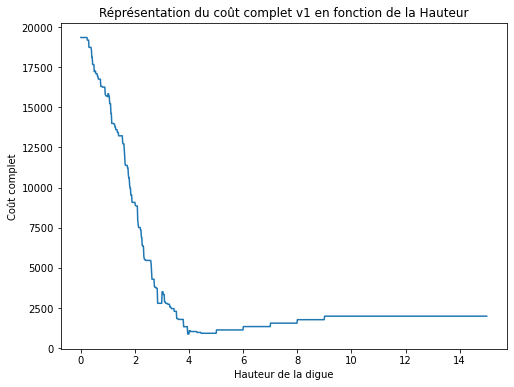

In [245]:
x, y = return_x_y()
plt.figure(figsize=(8,6),
           facecolor=None)
plt.plot(x, y)
plt.xlabel("Hauteur de la digue")
plt.ylabel("Coût complet")
plt.title("Réprésentation du coût complet v1 en fonction de la Hauteur")
plt.show()

In [192]:
x[np.array(y).argmin()] # Valeur de l'argmin de la fonction cout

3.948948948948949

En considerant la fonction coût complet qui met les poids $a=0.99$ au coût d'investissement et $b=0.01$ au coût de dommage, de sorte à prêter essentiellement d'attention au coût d'investissement. Ainsi on trouve $h_d=3.948$

Valeur du maximum des maximums des hauteurs pour $T=30$

In [249]:
H.max()

4.007606423772912

Le $h_d$ determiné est inferieur au max des hauteurs d'eau ce qui est normal car nous avons priorisé la minimisation du coût d'investissemnt plutôt que le coût de dommage.

Cette fois ci nous avons consideré la fonction coût complet qui met plus de poids au coût de dommage

In [253]:
def return_x_y(T=30, n=1000):
    H_ = generate_H(T)
    surverses_ = []
    x = []
    y = []
    hds = np.linspace(0, 15, n)
    for hd in hds:
        surverses_ = calcul_surverces(T=T,H=H, hd=hd)
        y.append(cout_complet_moy(surverses_, hd=hd, T=T, a=0.001, b=0.999))
        x.append(hd)
    return x, y

In [254]:
x, y = return_x_y()
#plt.plot(x, y)

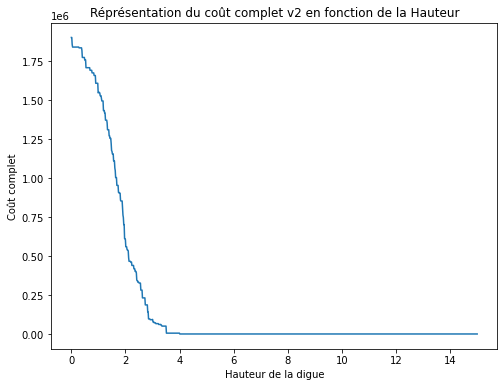

In [257]:
plt.figure(figsize=(8,6),
           facecolor=None)

plt.plot(x,y)
plt.xlabel("Hauteur de la digue")
plt.ylabel("Coût complet")
plt.title("Réprésentation du coût complet v2 en fonction de la Hauteur")
plt.show()

In [258]:
hd = x[np.array(y).argmin()] # Valeur de l'argmin de la fonction cout
hd

4.009009009009009

Le $h_d$ determiné est superieur au max des hauteurs d'eau ce qui est normal car nous avons priorisé la minimisation du coût de dommage plutôt que le coût d'investissement.

In [260]:
H.max()

4.007606423772912

D'après notre sumilation, le maximum du maximum des hauteurs de l'eau pour les $T=30$ prochaines année est $4.007$

Nous avons fait cette nouvelle réprésentation du coût complet en mettant les poids de $0.01$ et $0.99$ respectivement au coût total d'investissement et le côut de dommage. Ainsi le fait de mettre plus du poids au coût de dommage on voit que la hauteur de la digue qui minimise le coût complet est plus élévé que précédemment. Elle est de $44.007$ ce qui est legèrement supérieur à la hauteur maximum de l'eau dans les $T=30$ Prochaines années pour éviter qu'il y est de coût de dommage.  

### Définition de l'algorithme génétique


Nous allons utilisé l'algorithme génétique pour determiner la hauteur $h_d$ et la longueur $l_d$ qui mimimise le coût complet. Les algorithmes génétiques appartiennent à la famille des algorithmes évolutionnistes. Leur but est d'obtenir une solution approchée à un problème d'optimisation dont la fonction coût depend de plusieurs variables et dont la solution exacte n'est pas connue de manière explicite, pour le résoudre en un temps raisonnable. Les algorithmes génétiques utilisent la notion de sélection naturelle et l'appliquent à une population de solutions potentielles au problème donné. Dans notre cas il est question de miminiser le coût global de d'investissement et de dommage d'un digue sur une période $T$.

Dans cette partie nous allons consideré la version $v2$ de la fonction coût complet qui depend de la hauteur $h_d$ et de la longueur $l_d$ de la digue.

In [368]:
def optimisationgenetique(domaine: tuple,
                          #data:pd.DataFrame,
                          H: list,
                          T: int,
                          fcout,
                          fsurverses,
                          taillepop=50,
                          pas=0.5,
                          probmut=0.2,
                          elite=0.2,
                          maxiter=100,
                         a:int=1,
                         b:int=1):
    
    """
    Fonction qui calcule hd et ld optimale par l'algo génétique
    
    arguments:
    --------------------------------
    domaine: L'ensemble où hd et ld prennennt leur valeurs
    data: DataFrame qui contient les données historiques, 
    T: 
    """
    
    
    # Operation de mutation
    def muter(vec):
        
        i = random.randint(1,len(domaine)-1)
            
        if random.random()<0.5 and vec[i]>domaine[i][0]:
            return vec[0:i]+[vec[i]-pas]+vec[i+1:]
        elif vec[i]<domaine[i][1]:
            return vec[0:i]+[vec[i]+pas]+vec[i+1:]
        else:
            return vec
        
        # Operation de croisement
    def croiser(r1,r2):
            
        # Choisir nombre d'elmt
        i = random.randint(1,len(domaine)-1)
        return r1[0:i]+r2[i:]
    
    # Construire la population initiale
    pop=[]
    for i in range(taillepop):
        vec = [random.randint(domaine[i][0],domaine[i][1]) for i in range(len(domaine))]
        pop.append(vec)
        # Nombre de gagnant dans chaque generation
    topelite = int(elite*taillepop)
        
    # Boucle principale
    for i in range(maxiter):
        scores=[(fcout(fsurverses(T=T, H=H, hd=v[0]), hd=v[0], ld=v[1], T=T, a=a, b=b), v) for v in pop]
        scores = sorted(scores, key=lambda x: x[0])
            
        classes = [v for (s,v) in scores]
            
            # Debuter avec les gagnants
        pop = classes[0:topelite]
            
        # Ajouter les mutation et les croisement des gagnants
        while len(pop)<taillepop:
                
            if random.random()<probmut:
                    
                # mutation
                c = random.randint(0,topelite)
                pop.append(muter(classes[c]))
                
                
            else:
                # Croisement
                c1 = random.randint(0,topelite)
                c2 = random.randint(0,topelite)
                pop.append(croiser(classes[c1],classes[c2]))
                    
        if i%20==0:
            print(f"Iteration {i}, score: {scores[0][0]}")
            #print(scores[0][0])
        #print("ok")

    return scores[0][1]

In [369]:
hd = optimisationgenetique(domaine=[(0, 10), (1000, 5000)],
                          #data=data,
                          H=H,
                          T=30,
                          fcout=cout_complet_moy_v2,
                          fsurverses=calcul_surverces,
                          taillepop=100,
                          pas=1,
                          probmut=0.2,
                          elite=0.2,
                          maxiter=100,
                         a=0.01,
                         b=0.99)

Iteration 0, score: 0.075
Iteration 20, score: 0.075
Iteration 40, score: 0.075
Iteration 60, score: 0.075
Iteration 80, score: 0.075


In [370]:
hd

[6, 1273]

En appliquant l'algo génétique, on a trouvé $h_d=6$ et $l_d=1273$

### Algorithme scalade

In [373]:
def scalade(domaine,H,T,fcout,fsurverses,a=0.01,b=0.99):
    # Creer solution aleatoire
    sol = [random.randint(domaine[i][0],domaine[i][1]) for i in range(len(domaine))]
    
    # Boucle principale:
    while 1:
        
        # Creer une liste de solutions vosines
        voisins = []
        
        for j in range(len(domaine)):
            if(sol[j] > domaine[j][0]):
                voisins.append(sol[0:j]+[sol[j]+1]+sol[j+1:])
            if(sol[j] < domaine[j][1]):
                voisins.append(sol[0:j]+[sol[j]-1]+sol[j+1:])
                
        # Identifier la meilleur solution voisine
        actuel = fcout(fsurverses(T=T, H=H, hd=sol[0]), hd=sol[0], ld=sol[1], T=T, a=a, b=b)
        meilleur = actuel
        
        for j in range(len(domaine)):
            #print(f"voisins[0] = {voisins[0]}")
            cout = fcout(fsurverses(T=T, H=H, hd=voisins[j][0]), hd=voisins[j][0], ld=voisins[j][1], T=T, a=a, b=b)
            if(cout<meilleur):
                meilleur = cout
                sol=voisins[j]
        if meilleur==actuel:
            break
            
    return sol

In [391]:
hd = scalade(domaine=[(0,10), (1000, 5000)],
            H=H,
            T=30,
            fcout=cout_complet_moy_v2,
            fsurverses=calcul_surverces,
           a=0.01,
           b=0.99)


In [392]:
hd

[5, 2894]

En appliquant l'algo génétique, on a trouvé $h_d=5$ et $l_d=2894$